

# Project: Investigate a Dataset - TMDB Movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Project over view:** Fot this Project i choose TMDb movie data - this data set contains information
about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

> **Basic Questions:**
> 1. Which genres are most popular from year to year? 
> 2. Which film are most popular from year to year? and unpopular?
> 3. Which film more profit year to year?
> 4. Which cast are most popular from year to year? and unpopular? 
> 5. Runtime year to year?
> 6. Budget and Revenue year to year?



In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Plan**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

In [4]:
# Load data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [28]:
df.info() #know more better about type and quantity this Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [29]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [30]:
df.shape

(10866, 21)

In [31]:
sum(df.duplicated()) # we can see how much duplicates we have 

1

In [32]:
df.isnull().sum() # How many missing and null value we have

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [33]:
type(df['release_date'][0]) # More detailed know what type of data types

str

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7db653470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc7db356a90>]], dtype=object)

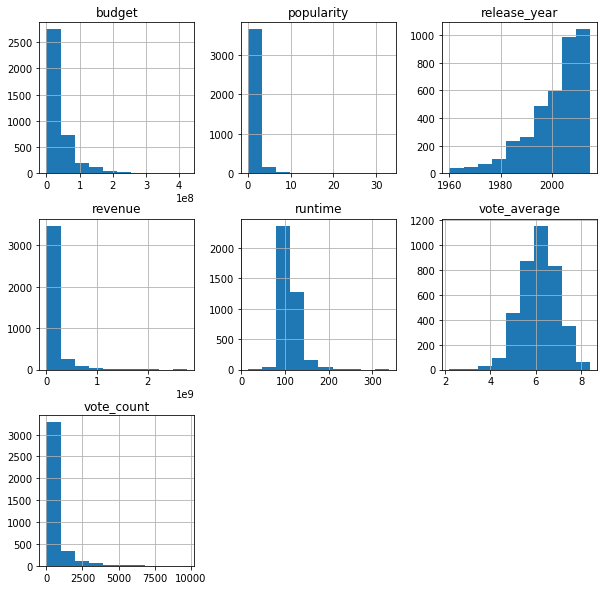

In [6]:
df.hist(figsize=(10,10)) # More clearly looked our data frame

### Data Cleaning 
> **Plan**: In this section we delete all duplicates and null values and change data types

In [34]:
df.drop(['id','imdb_id','homepage','budget_adj','revenue_adj','overview','tagline','keywords'], axis = 1, inplace =True)

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df['release_date']=pd.to_datetime(df['release_date'])

In [37]:
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
null_dr = ['budget','revenue','runtime']
df[null_dr] = df[null_dr].replace(0, np.NaN)
df.dropna(subset = null_dr, inplace = True)

In [42]:
df.to_csv('tmdb-movies.csv', index=False)

In [44]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which genres are most popular from year to year?
> In this section we inditified what genre more popular.
> 1. Wee need copy our Data Frame
> 2. After that we create separate column 'Genre Split' where we use split function 
> 3. Make analysis

In [5]:
genrep = df.copy()

In [7]:
split_columns = genrep['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

In [8]:
split_columns.head()

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
dtype: object

In [9]:
split_columns.name= 'Genre Split'
genrep = genrep.drop(['genres'], axis=1).join(split_columns)

In [9]:
genrep.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,Genre Split
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Adventure
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Science Fiction
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Thriller
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Action


In [10]:
genrep.to_csv('tmbd-split-genre.csv', index=False)

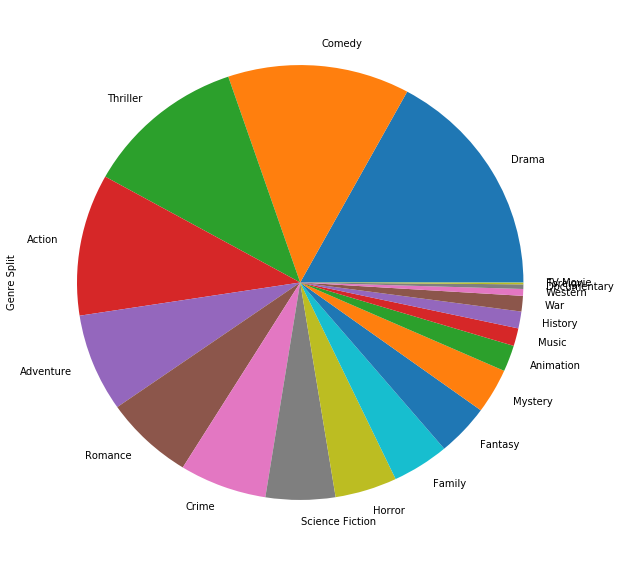

In [15]:
genrep['Genre Split'].value_counts().plot(kind='pie', figsize=(10,10))


>From this Pie chart we can see common genre is Drama, but we can't see more clearly

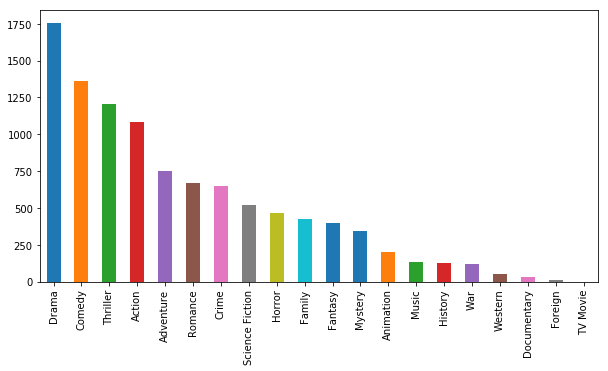

In [26]:
genrep['Genre Split'].value_counts().plot(kind='bar', figsize=(10,5));

>From this Bar chart we can see more clearly data. In this chat, we see that Drama, comedy and thriller hold the leading places, if you look at the total number.

In [80]:
genrep.groupby('release_year')['Genre Split'].value_counts()

release_year  Genre Split    
1960          Drama               3
              Action              2
              Comedy              2
              Romance             2
              Adventure           1
              History             1
              Horror              1
              Thriller            1
              Western             1
1961          Drama               6
              Comedy              4
              Action              2
              Adventure           2
              Family              2
              Animation           1
              Crime               1
              History             1
              Horror              1
              Music               1
              Romance             1
              War                 1
              Western             1
1962          Drama               5
              Adventure           3
              Action              2
              Western             2
              Crime               

> Let's group by and look total number of frequently encountered genres year to year. In this list we can see overall list, but we need more largest, so that's why we group by largest value

In [11]:
show_genre= genrep.groupby('release_year')['Genre Split'].value_counts()
show_genre.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)


release_year  Genre Split
1960          Drama           3
1961          Drama           6
1962          Drama           5
1963          Drama           3
1964          Drama           4
1965          Drama           3
1966          Action          2
1967          Drama           7
1968          Drama           6
1969          Adventure       2
1970          Drama           7
1971          Thriller        8
1972          Action          3
1973          Drama           7
1974          Drama           8
1975          Drama           5
1976          Drama           7
1977          Drama           9
1978          Drama           7
1979          Drama           7
1980          Drama           8
1981          Comedy          9
1982          Drama          12
1983          Thriller       13
1984          Action         16
1985          Comedy         19
1986          Drama          19
1987          Comedy         23
1988          Comedy         25
1989          Comedy         24
1990          

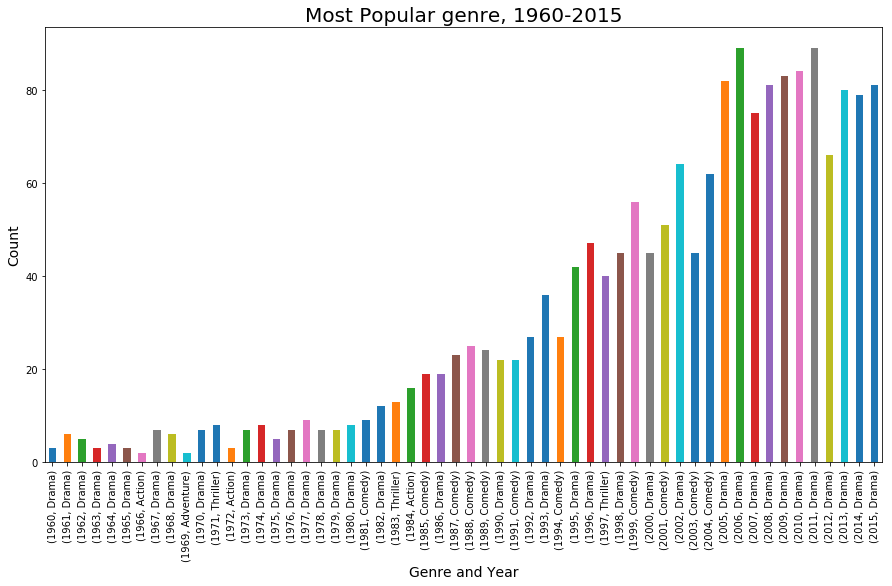

In [92]:
show_genre.groupby(level=0).nlargest(1).reset_index(level=0, drop=True).plot(kind='bar', figsize=(15,8));
plt.title('Most Popular genre, 1960-2015', size=20)
plt.xlabel('Genre and Year', size=14)
plt.ylabel('Count', size=14);

> From this bar chart we can see more frequently encountered genres year to year it's Drama. Total number of Drama year to year occurs 38 time.

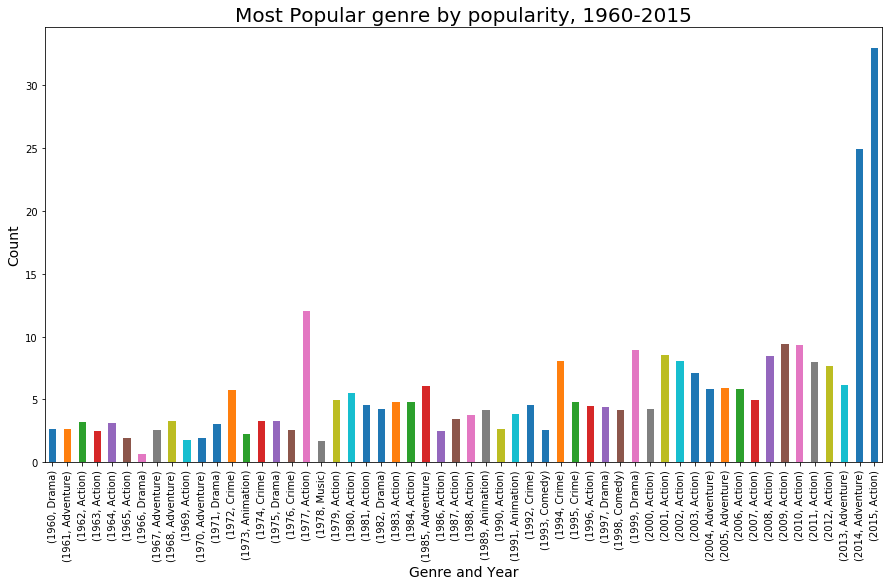

In [22]:
genrep=pd.read_csv('tmbd-split-genre.csv')
popularganre = genrep.groupby(['release_year','Genre Split'])['popularity'].max()
popularganre.groupby(level=0).nlargest(1).reset_index(level=0, drop=True).plot(kind='bar', figsize=(15,8));
plt.title('Most Popular genre by popularity, 1960-2015', size=20)
plt.xlabel('Genre and Year', size=14)
plt.ylabel('Count', size=14);

> let's group by genre from popularity. From this bar chart we can see more popular genre year to year - Action. In 2015 popularity instantly increased compared to other years. 

### 2. Which film are most popular from year to year? and unpopular?

In [24]:
maxfilm = df.groupby(['release_year','original_title'])['popularity'].max()
maxfilm.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

release_year  original_title                                   
1960          Psycho                                                2.610362
1961          One Hundred and One Dalmatians                        2.631987
1962          Dr. No                                                3.170651
1963          From Russia With Love                                 2.508235
1964          Goldfinger                                            3.153791
1965          Thunderball                                           1.910465
1966          Who's Afraid of Virginia Woolf?                       0.670274
1967          The Jungle Book                                       2.550704
1968          2001: A Space Odyssey                                 3.309196
1969          On Her Majesty's Secret Service                       1.778746
1970          The Aristocats                                        1.936962
1971          A Clockwork Orange                                    3.072555
1972        

> In this section I group by films by populatity and filter only by maximum rating. And we can see most popular films year to year. 

In [26]:
minfilm = df.groupby(['release_year','original_title'])['popularity'].min()
minfilm.groupby(level=0).nsmallest(1).reset_index(level=0, drop=True)

release_year  original_title                               
1960          Cinderfella                                      0.055821
1961          One-Eyed Jacks                                   0.173731
1962          Birdman of Alcatraz                              0.239410
1963          55 Days at Peking                                0.207161
1964          The Night of the Iguana                          0.182922
1965          The Greatest Story Ever Told                     0.146033
1966          Fantastic Voyage                                 0.207257
1967          A Countess from Hong Kong                        0.114342
1968          Charly                                           0.045242
1969          The Wild Bunch                                   0.615889
1970          The Ballad of Cable Hogue                        0.193759
1971          Vanishing Point                                  0.275523
1972          The Getaway                                      0.260584
1973

> For unpopular films same schema, but we use minimum rating

### 3. Which film more profit year to year?

> In this section we answeared question to what profit each film received every year.
> 1. To find profit, we subtract revenue from the budget to come to a common answer
> 2. Subsequently, we group by year and filter by the total amount

In [6]:
df.insert(3, 'profit', df['revenue'] - df['budget'])

In [8]:
df.head(1)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


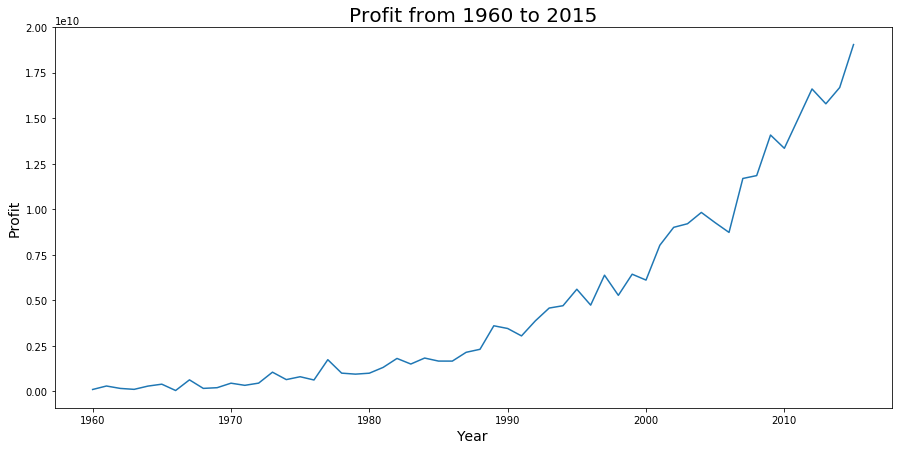

In [8]:
df.groupby('release_year')['profit'].sum().plot(kind = 'line', figsize = (15, 7))
plt.title('Profit from 1960 to 2015', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Profit', fontsize = 14);

> Thanks to this line chart, we can notice that the profit of films is growing every year with actual progression

In [22]:
maxdf = df.groupby(['release_year','original_title'])['profit'].sum()
maxdf.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

release_year  original_title                               
1960          Spartacus                                        4.800000e+07
1961          One Hundred and One Dalmatians                   2.118800e+08
1962          Dr. No                                           5.850000e+07
1963          From Russia With Love                            7.639876e+07
1964          Goldfinger                                       1.214000e+08
1965          The Sound of Music                               1.550143e+08
1966          Who's Afraid of Virginia Woolf?                  2.623669e+07
1967          The Jungle Book                                  2.018436e+08
1968          2001: A Space Odyssey                            4.471537e+07
1969          Butch Cassidy and the Sundance Kid               9.630889e+07
1970          Love Story                                       1.342000e+08
1971          Diamonds Are Forever                             1.088000e+08
1972          The Godfather 

> In this list we finally can see our most profit fims year to year. 

### 4. Which cast are most popular from year to year? and unpopular?

> In this section we inditified what cast more popular.
> 1. Wee need copy our Data Frame
> 2. After that we create separate column 'Cast Split' where we use split function 
> 3. Make analysis

In [32]:
cast =df.copy()
split_cast = cast['cast'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_cast.head(5)

0            Chris Pratt
0    Bryce Dallas Howard
0            Irrfan Khan
0      Vincent D'Onofrio
0          Nick Robinson
dtype: object

In [35]:
split_cast.name= 'Cast Split'
cast = cast.drop(['cast'], axis=1).join(split_cast)
cast.head(5)

,popularity,budget,revenue,profit,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Cast Split
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Chris Pratt
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Bryce Dallas Howard
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Irrfan Khan
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Vincent D'Onofrio
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Nick Robinson


In [37]:
cast.to_csv('tmbd-split-cast.csv', index=False)

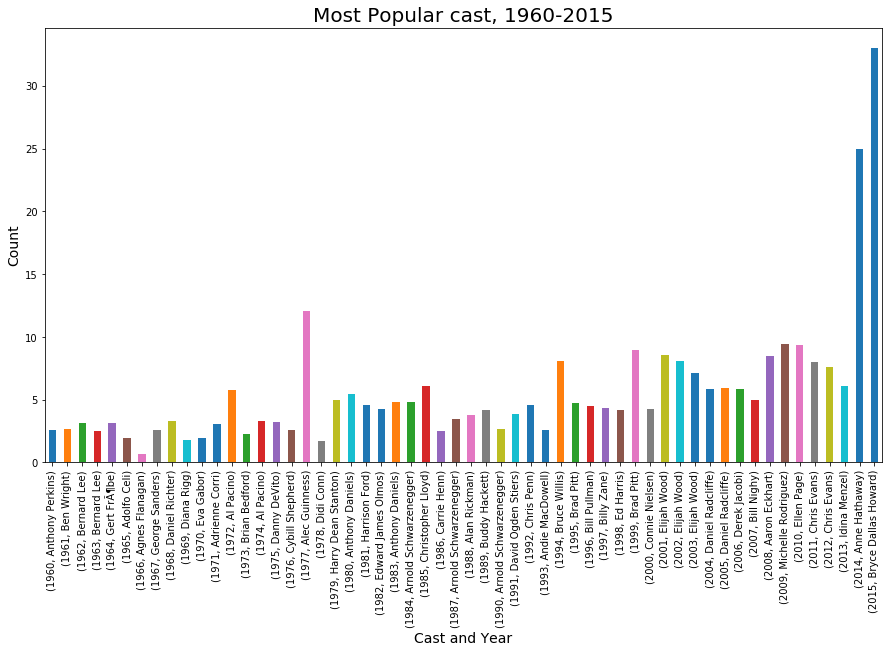

In [40]:
maxcast = cast.groupby(['release_year','Cast Split'])['popularity'].max()
maxcast.groupby(level=0).nlargest(1).reset_index(level=0, drop=True).plot(kind='bar', figsize=(15,8));
plt.title('Most Popular cast, 1960-2015', size=20)
plt.xlabel('Cast and Year', size=14)
plt.ylabel('Count', size=14);

> From this bar chart we can see popular cast year to year and notice that many actors meet twice like Bernard Lee, Brad Pitt, Elijah Wood, Daniel Readcliffe, Chris Evans.

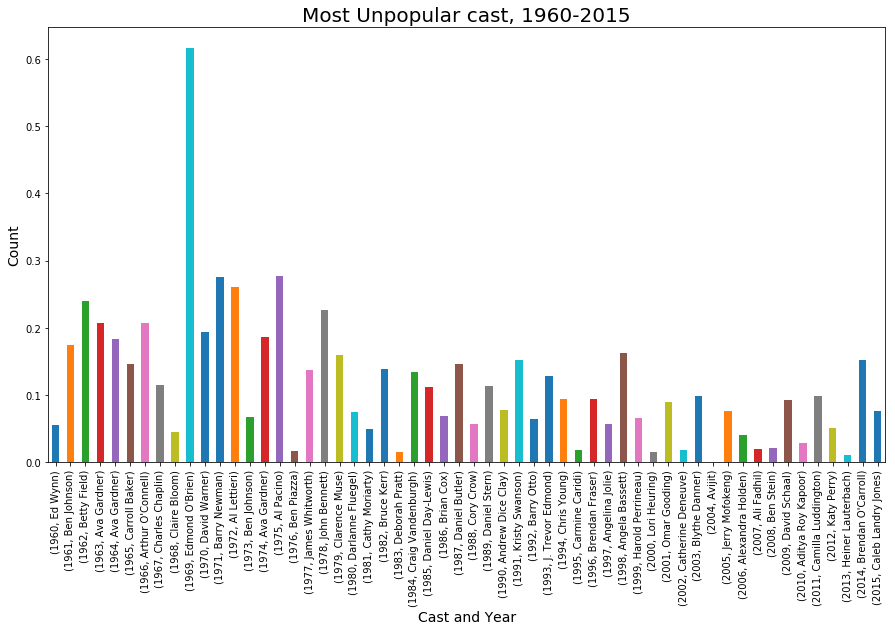

In [41]:
mincast = cast.groupby(['release_year','Cast Split'])['popularity'].min()
mincast.groupby(level=0).nsmallest(1).reset_index(level=0, drop=True).plot(kind='bar', figsize=(15,8));
plt.title('Most Unpopular cast, 1960-2015', size=20)
plt.xlabel('Cast and Year', size=14)
plt.ylabel('Count', size=14);

> Also we have unpopular cast year to year

### 5. Runtime year to year?

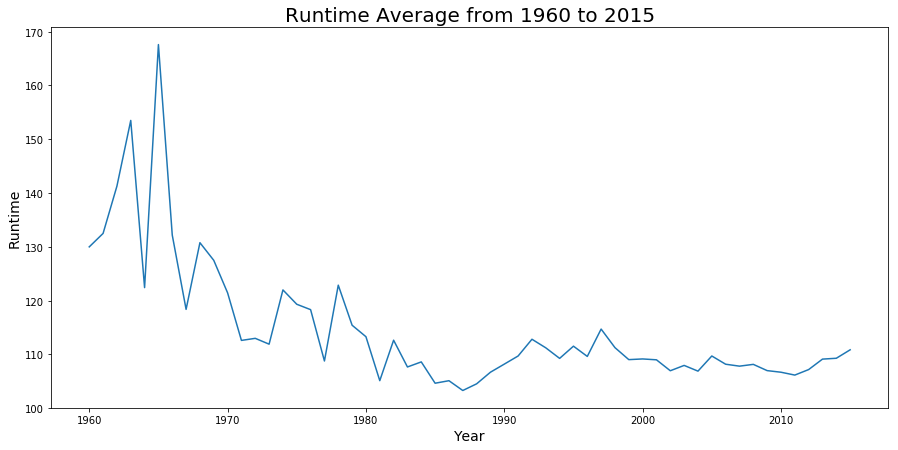

In [9]:
df.groupby('release_year')['runtime'].mean().plot(kind = 'line', figsize = (15, 7))
plt.title('Runtime Average from 1960 to 2015', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Runtime', fontsize = 14);

In [9]:
df.groupby('release_year')['runtime'].mean()

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
1965    167.600000
1966    132.200000
1967    118.384615
1968    130.777778
1969    127.500000
1970    121.454545
1971    112.615385
1972    113.000000
1973    111.916667
1974    122.000000
1975    119.333333
1976    118.333333
1977    108.789474
1978    122.882353
1979    115.437500
1980    113.304348
1981    105.133333
1982    112.653846
1983    107.677419
1984    108.619048
1985    104.658537
1986    105.125000
1987    103.304348
1988    104.543860
1989    106.705882
1990    108.207547
1991    109.720000
1992    112.830189
1993    111.236111
1994    109.274194
1995    111.543210
1996    109.639535
1997    114.722222
1998    111.271739
1999    109.043103
2000    109.169811
2001    109.008264
2002    106.976378
2003    107.966942
2004    106.904762
2005    109.717791
2006    108.189349
2007    107.830303
2008    108.161677
2009    107.000000
2010    106.702247
2011    106.170854

> In this section we see that every year that the total runtime of films decreases and reaches an average of 1.5 hours

### 6. Budget and Revenue year to year?

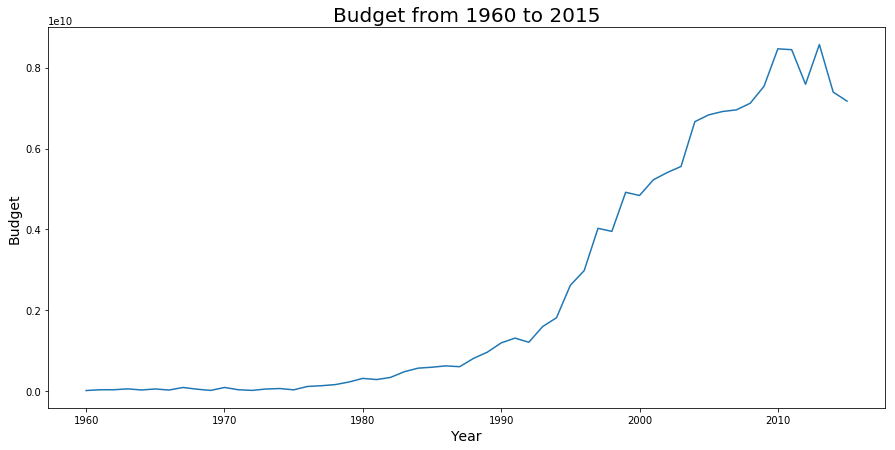

In [10]:
df.groupby('release_year')['budget'].sum().plot(kind = 'line', figsize = (15, 7))
plt.title('Budget from 1960 to 2015', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Budget', fontsize = 14);

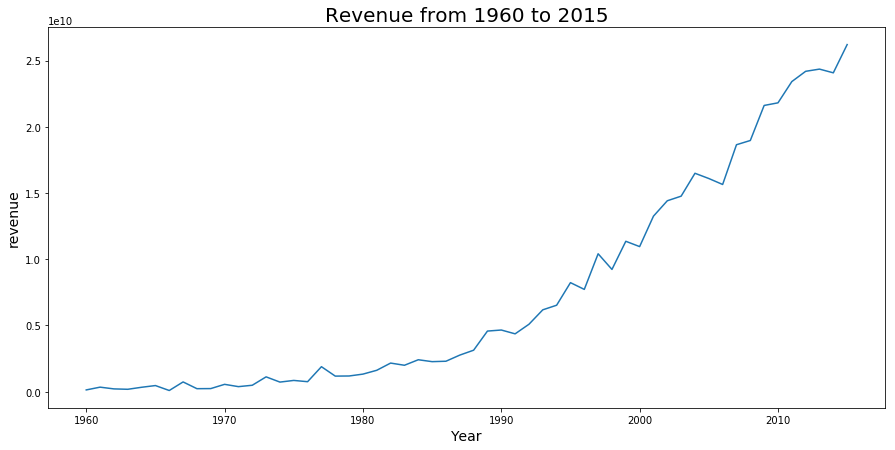

In [12]:
df.groupby('release_year')['revenue'].sum().plot(kind = 'line', figsize = (15, 7))
plt.title('Revenue from 1960 to 2015', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('revenue', fontsize = 14);

> Budget and Revenue every year it is progressively increasing

<a id='conclusions'></a>
## Conclusions
> In this reasearch, we did an analysis on films and general information on the film. We answered the main 6 questions posed that interest us.The unifying whole is that I conducted the research based on the popularity rating.
Let's look at the general answer to the question:
> 1. For starters, I looked at the total number, and if we look from this format, we will notice that Drama is most often found as a genre of films. And the smallest number of genres is TV movies. When dividing the genre into years and popularity, we will see a completely different picture. One of the most popular genres is Action, a sharp jump in popularity is observed in 1977 and 2008, but in 2015 the number increased 3 times. We also see a sharp jump in popularity by genre 1994 Crime, 1999 Drama, 2014 Adventure.
by total number year to year: Drama
By Populatiry year to year: Action
> 2. To the second question, we examined the most popular films for each year and not popular.
In this list there are series of three parts of The Lord of the Rings and two parts of Harry Potter. For non-popular films, whose rating and popularity is the lowest, they are really worthy of this rating, because not a single familiar film is found here.
> 3. In the third questions we considered profit year to year. You can notice that the profit of films increased every year, which shows that the popularity and total profit of films increases every year with a progressive speed. A sharp jump in profit growth can be seen since 1990. Films from the general series also brought great profit, such as: Star Wars (1977,1999,2015), Indiana Jones (1984, 1989), Harry Potter (2001,2005,2007,2011), The Lord of the Rings (2002,2003)
> 4. For the fourth question, we looked at the actors who are most popular for the overall film popularity rating. You can see that several actors meet twice or thrice, as Bernard Lee, Brad Pitt, Elijah Wood, Daniel Readcliffe, Chris Evans. 
The spikes in popularity among: 1977 Alec Guinness, 1994 Bruce Willis,1999 Brad Pitt, 2009 Michelle Rodrinquez.
The greatest spikes in popularity are observed precisely in 2014 Anne Hathaway and 2015 Bryce Dallas Howard.
Of the non-popular actors, the smallest has the actor: 1976 Ben Piazza, 1983 Deborah Pratt, 1995 Carmine Candi, 2000 Lori Heuring, 2004 Avijit, 2013 Heiner Lauterbach
> 5. On the fifth question, you can notice that every year the total amount of runtime the film decreases. Sharp jumps in the film’s runtime decrease are observed in 1964 - 122.428571, 1967 - 118.384615, 1977 - 108.789474, 1981 - 105.133333, and since 1993 it has been showing films stably within 106.
> 6. The budget and total revenue grows every year on films. Vibrant jumps and increase in budgets and revenue begins in 1980, then the numbers grow steadily every year, and the revenue of the film increases from the budgets.

> From this analysis, we can understand that every year the need for films increases along with their profitability. Every year there are a lot of consumer content on the part of films, and with the advent of the Internet, their consumption has doubled and tripled. You may notice that people like live films, where there is a lively and illuminating plot, if you can look at the list of popular films you can see that those films with an unusual plot and genre take popularity.